## Getting a sense of speed differences ...
Get a sense of measuring performance in terms of the time taken as well as the number of steps - called benchmarking. Using the notebook run this snippet to get a feeling of the time. This example uses the ```!``` to tell Jupyter to use the Operating System. May take a second or two to complete and then echo back an answer. The "timeit" is a python library used here to time the running of the command. In this example, notice a string is created using only "x", joined 10,000 or 100,000 times. How long did it take to run?

In [1]:
!python -m timeit "'x'.join(str(n) for n in range(100))"

10000 loops, best of 3: 21.9 usec per loop


In [2]:
#In this example, we use "timeit" again to time the creation of a 
#list of numbers and x's.  May take a few seconds to show!
!python -m timeit "'x'.join([str(n) for n in range(100)])"

100000 loops, best of 3: 19.2 usec per loop


In [3]:
# Now let's the use "map" function.  THe purpose of these three 
# statements is to demonstrate how our choice of algorithm or 
# functions we use affect the performance of the system.
# The measurement is the number of times the same command runs recursively.
!python -m timeit "'x'.join(map(str, range(100)))"

# for some fun, print the string!  
# Compare the number of "seconds" per loop.

100000 loops, best of 3: 15.4 usec per loop


In [4]:
# We can see similar outputs using Python in the Jupyter notebook
import timeit
print("Test 1")
timeit.timeit('"x".join(str(n) for n in range(100))', number=10000)

Test 1


0.23387357706313605

In [5]:
print("Test 2")
timeit.timeit('"x".join([str(n) for n in range(100)])', number=10000)

Test 2


0.19873401109559746

In [6]:
print("Test 3")
timeit.timeit('"x".join(map(str, range(100)))', number=10000)

Test 3


0.16057196019006498

In [7]:
#In this example, how many operations are performed?
x = ['tea','coffee','champagne']
for i in x:
    print(i)

tea
coffee
champagne


##### Answer: 6 operations

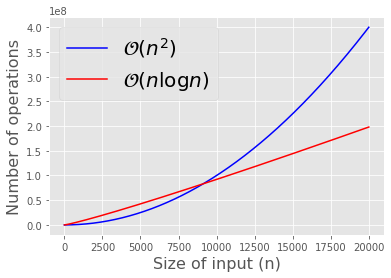

In [1]:
# Get a feeling of the difference between performance by running this snippet.  
# Don't worry about the import statements or the script itself nor the warning message that will appear 
# A chart will be created to show the difference of FLOPS between a bubble sort (On^2)
# and a merge sort (O(nlogn)). 
# We'll cover this towards the end of the unit.

import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')


def f1(n, k):
    return k*n*n

def f2(n, k):
    return k*n*np.log(n)

n = np.arange(1, 20001)

plt.plot(n, f1(n, 1), c='blue')
plt.plot(n, f2(n, 1000), c='red')
plt.xlabel('Size of input (n)', fontsize=16)
plt.ylabel('Number of operations', fontsize=16)
plt.legend(['$\mathcal{O}(n^2)$', '$\mathcal{O}(n \log n)$'], loc='best', fontsize=20);

## Optional - more complex examples

Given this otherwise useless snippet, what's the most dominant influence on O(n)?
```
a = 5
b = 6
c = 7
for i in range (n):
	for j in range(n):
		x = i * j
		y = j * j
		z = i * j
for k in range(n):
	w = a * k + 45
	v = b * b
d = 33
```

In [9]:
a = 5
b = 6
c = 7
n = 100
for i in range(n):
    for j in range(n):
        x = i * j
        y = j * j
        z = i * j
for k in range(n):
    w = a * k + 45
    v = b * b
d = 33

##### ANSWER:

The nested loops (i & j) each have n times the operations as just one loop (k). One for loop (k) executes n times or 100 times; while the nest loop (i & j) is executed 100 x 100 times (10,000 times).

Compare these three statements: 
- Which might run faster?  Why?

In [10]:
x = sorted(['z','b','e','f','q','3','0'])
y = sorted(['a','b','e','f','3','0','z'])
z = sorted(['z','q','e','b','a','3','0'])

##### ANSWER:

y and z are faster than x because x is entirely unordered.  Each element would be compared to the one next to it to determine the order. y has elements a, b, e, and f in order already and so will be pretty quick at moving the rest of data. z could be fastest of all depending how the list is sorted - since it is already in a reverse order - using pop might add a step but might 
yield a faster overall time or its worse-case scenario won't be as slow as the others